Use this notebook to build a first simple pymc model. The data are generated by linear model `y=ax + b` with Normal noise. However, there were three different instruments measuring `y`, each with different noise level $\sigma_i$.

Frist, try to build a linear model with single $\sigma$ for all data and then extend it to three different sigmas using the information which point was measured by which instrument.

In [5]:
import arviz as az
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

Generate synthetic data we will fit.

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Which point was measured by which instrument?
num_groups = 3  # Different groups with different noise levels
points_per_group = 20  # Data points per group
x = np.linspace(0, 10, points_per_group * num_groups)
group_ids = np.repeat(np.arange(num_groups), points_per_group)
np.random.shuffle(group_ids)

# True parameters for the synthetic data
true_a = 2.0
true_b = -0.5
true_sigma = [0.5, 2.0, 4.0]  # Different noise for different groups

# Generate noisy observations
y = true_a * x + true_b + np.array([np.random.normal(0, true_sigma[g]) for g in group_ids])

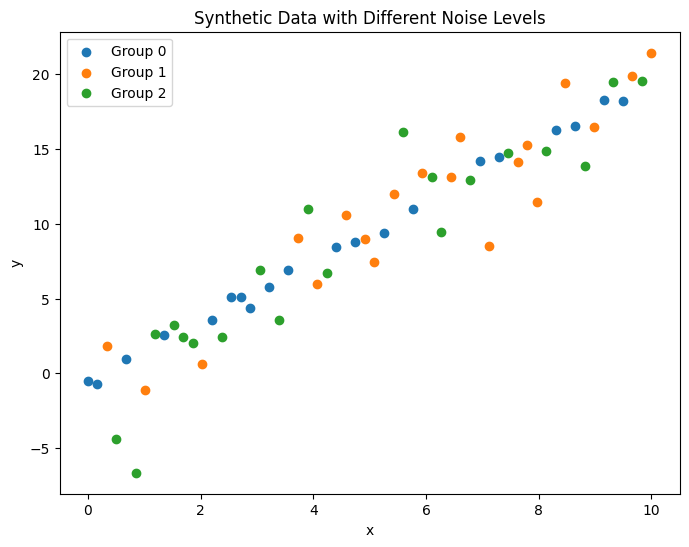

In [4]:
# Plot the data
plt.figure(figsize=(8, 6))
for g in range(num_groups):
    plt.scatter(x[group_ids == g], y[group_ids == g], label=f"Group {g}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Synthetic Data with Different Noise Levels")
plt.show()

In [ ]:
# Build model with pymc
with pm.Model() as model:
    ...

Initializing NUTS using jitter+adapt_diag...


In [ ]:
# Sample
with model:
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

In [ ]:
# Plot trace
az.plot_trace(trace)